In [1]:
import numpy as np
import caesar
import matplotlib.pyplot as plt

progen finder

In [2]:
def progen_index(obj,compare,snap_path):
    
    progen_index = caesar.progen.progen_finder(obj,compare, '/disk04/rad/sim/m100n1024/s50/Groups/m100n1024_078.hdf5',snap_path ,n_most=1, save=False)
    progen_index = progen_index.flatten()
    
    progen_index = progen_index[~np.isin(progen_index, -1)]
    return progen_index


loop files

In [11]:
file_id = [[151,"z_0"],[105,"z_1"],[78,"z_2"],[62,"z_3"],[51,"z_4"],[36,"z_6"]]

def loop_files(loop_id, parttype, input_current):
    snap_dir = '/disk04/rad/sim/m100n1024/s50'
    obj_current = caesar.load(input_current)
    for infile in loop_id:
        if infile[0] < 100:
            sim = caesar.load('/disk04/rad/sim/m100n1024/s50/Groups/m100n1024_0%s.hdf5'%(infile[0]))
        else:
            sim = caesar.load('/disk04/rad/sim/m100n1024/s50/Groups/m100n1024_%s.hdf5'%(infile[0]))
        
        index_01 = np.array(progen_index(obj_current,sim,snap_dir))
        

        index_quenched = []
        for s,b in enumerate(index_01):
            if np.log10(obj_current.galaxies[s].masses['stellar'])>10.5:
                if (np.log10(float(obj_current.galaxies[s].sfr) + 1.e-3)- np.log10(obj_current.galaxies[s].masses['stellar'])) < -11:
                    index_quenched.append(b)

        pmass_target   = np.log10(np.asarray([sim.galaxies[i].masses['stellar'] for i in index_01]))
        pmass_quenched = np.log10(np.asarray([sim.galaxies[i].masses['stellar'] for i in index_quenched]))
        

        if parttype == 'ms' : 
            property_target = pmass_target
            
        elif parttype == 'mHI' : 
            property_target = np.log10(np.asarray([sim.galaxies[i].masses['HI'] for i in index_01])+1.e-3) - pmass_target
            property_quenched = np.log10(np.asarray([sim.galaxies[i].masses['HI'] for i in index_quenched])+1.e-3) - pmass_quenched
            
        elif parttype == 'mbh' : 
            property_target = np.log10(np.asarray([sim.galaxies[i].masses['bh'] for i in index_01])+1.e-3) - pmass_target
            property_quenched = np.log10(np.asarray([sim.galaxies[i].masses['bh'] for i in index_quenched])+1.e-3) - pmass_quenched
            
        elif parttype == 'sfr' : 
            property_target = np.log10(np.asarray([sim.galaxies[i].sfr for i in index_01])+1.e-3) - pmass_target
            property_quenched = np.log10(np.asarray([sim.galaxies[i].sfr for i in index_quenched])+1.e-3) - pmass_quenched
            
        elif parttype == 'mH2' : 
            property_target = np.log10(np.asarray([sim.galaxies[i].masses['H2'] for i in index_01])+1.e-3) - pmass_target
            property_quenched = np.log10(np.asarray([sim.galaxies[i].masses['H2'] for i in index_quenched])+1.e-3) - pmass_quenched
            
        elif parttype == 'mbh_fd': 
            property_target = np.asarray([sim.galaxies[i].bh_fedd for i in index_01])
            property_quenched = np.asarray([sim.galaxies[i].bh_fedd for i in index_quenched])
            
        elif parttype == 'mbhfr':
            property_target = np.log10(np.asarray([sim.galaxies[i].bhmdot for i in index_01])+1.e-3) - (np.log10(np.asarray([sim.galaxies[i].sfr for i in index_01])+1.e-3))
            property_quenched = np.log10(np.asarray([sim.galaxies[i].bhmdot for i in index_quenched])+1.e-3) - (np.log10(np.asarray([sim.galaxies[i].sfr for i in index_quenched])+1.e-3))
            
        
        plt.figure(figsize=(12,8))
        plt.scatter(pmass_target, property_target, s=5, label='redshit at %s'%(infile[1]))
        plt.scatter(pmass_quenched, property_quenched, s=5,c='red',label='quenched galaxies')
        plt.xlabel('$log_{10}M_{\star}$')
        plt.ylabel('$log_{10}(f_{H_I})$')
        plt.ylim(-14,1)
        plt.xlim(8,12.5)
        plt.legend()
        plt.grid(True)
        plt.savefig('final task1/%s_mh1.png'%(infile[1]))
        plt.show()

        




        

        



get progen

yt : [INFO     ] 2022-04-08 08:27:59,921 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_078.hdf5
yt : [INFO     ] 2022-04-08 08:28:00,004 Found 545417 halos
yt : [INFO     ] 2022-04-08 08:28:00,021 Found 30743 galaxies
yt : [INFO     ] 2022-04-08 08:28:00,024 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_151.hdf5
yt : [INFO     ] 2022-04-08 08:28:00,095 Found 464043 halos
yt : [INFO     ] 2022-04-08 08:28:00,125 Found 55609 galaxies
yt : [INFO     ] 2022-04-08 08:28:23,119 Progen doing 30743 groups (nproc=1), RAM=6.075 GB


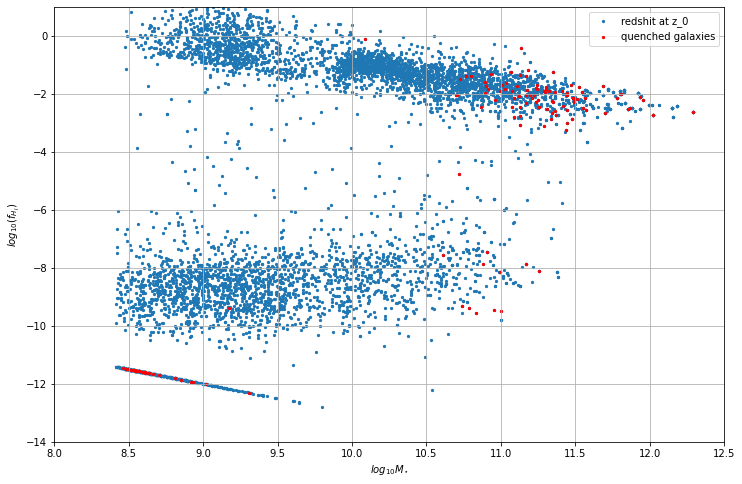

yt : [INFO     ] 2022-04-08 08:28:38,840 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_105.hdf5
yt : [INFO     ] 2022-04-08 08:28:38,893 Found 530411 halos
yt : [INFO     ] 2022-04-08 08:28:38,905 Found 39298 galaxies
yt : [INFO     ] 2022-04-08 08:28:59,214 Progen doing 30743 groups (nproc=1), RAM=5.675 GB


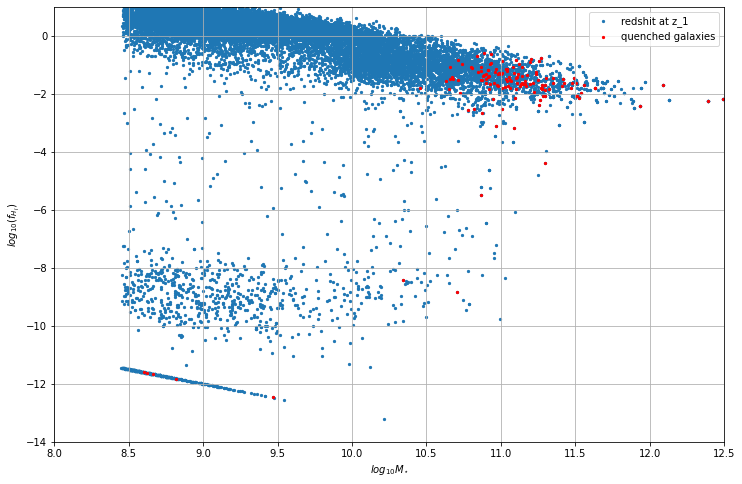

yt : [INFO     ] 2022-04-08 08:29:15,052 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_078.hdf5
yt : [INFO     ] 2022-04-08 08:29:15,131 Found 545417 halos
yt : [INFO     ] 2022-04-08 08:29:15,148 Found 30743 galaxies
yt : [INFO     ] 2022-04-08 08:29:22,951 Progen doing 30743 groups (nproc=1), RAM=5.375 GB


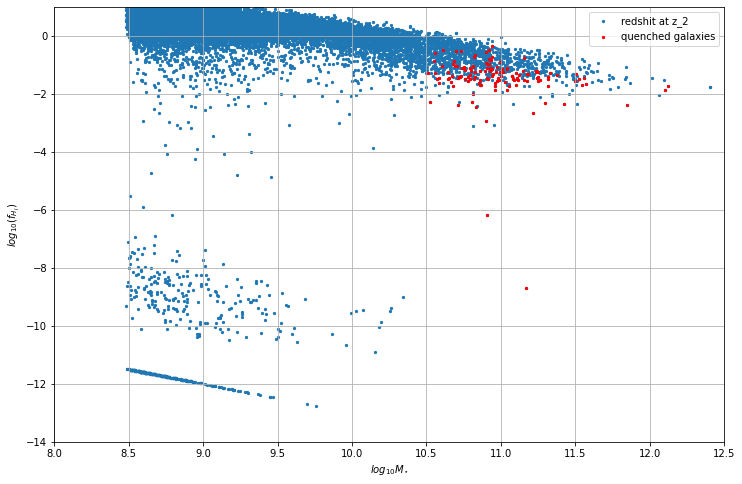

yt : [INFO     ] 2022-04-08 08:29:34,688 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_062.hdf5
yt : [INFO     ] 2022-04-08 08:29:34,767 Found 497446 halos
yt : [INFO     ] 2022-04-08 08:29:34,781 Found 24546 galaxies
yt : [INFO     ] 2022-04-08 08:29:41,391 Progen doing 30743 groups (nproc=1), RAM=5.345 GB


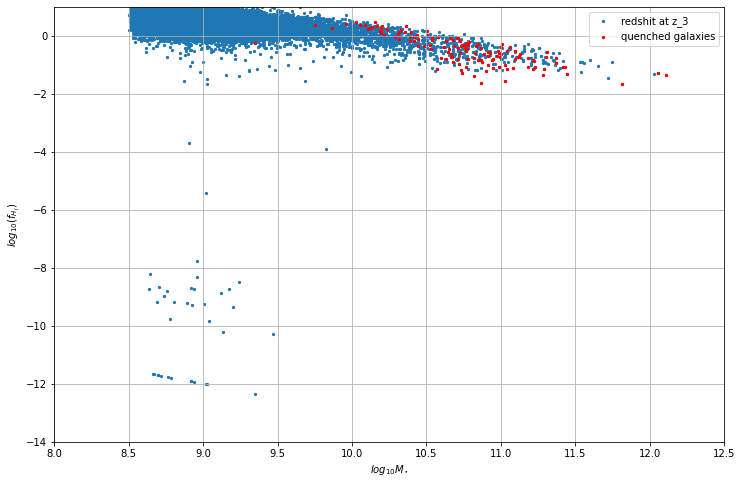

yt : [INFO     ] 2022-04-08 08:29:51,483 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_051.hdf5
yt : [INFO     ] 2022-04-08 08:29:52,389 Found 401567 halos
yt : [INFO     ] 2022-04-08 08:29:56,856 Found 19104 galaxies
yt : [INFO     ] 2022-04-08 08:30:03,335 Progen doing 30743 groups (nproc=1), RAM=5.34 GB


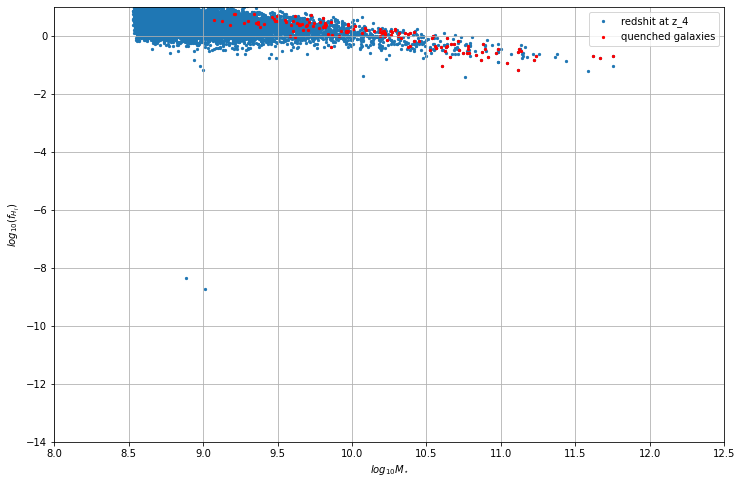

yt : [INFO     ] 2022-04-08 08:30:13,856 Opening /disk04/rad/sim/m100n1024/s50/Groups/m100n1024_036.hdf5
yt : [INFO     ] 2022-04-08 08:30:14,486 Found 175201 halos
yt : [INFO     ] 2022-04-08 08:30:16,815 Found 6208 galaxies
yt : [INFO     ] 2022-04-08 08:30:20,597 Progen doing 30743 groups (nproc=1), RAM=5.314 GB


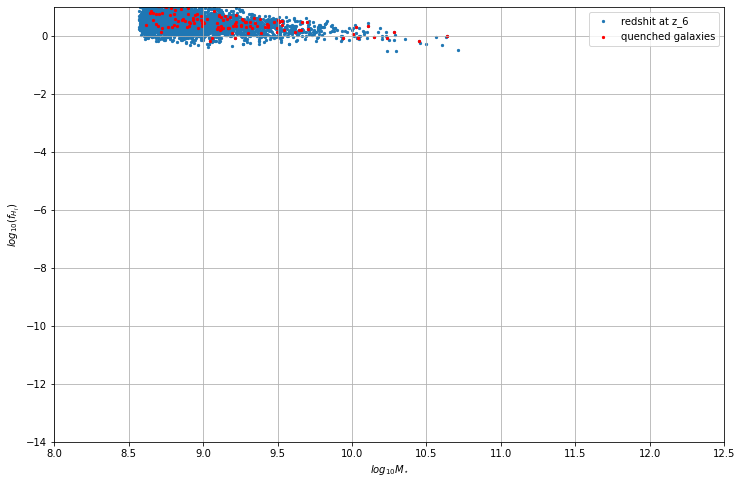

In [12]:
result = loop_files(file_id,"mHI",'/disk04/rad/sim/m100n1024/s50/Groups/m100n1024_078.hdf5')